<a href="https://colab.research.google.com/github/usamakh9/DLAssignments/blob/main/fraud%3Ddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Colab Notebooks/archive.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
file

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# New Section

# New Section

In [14]:
n=file.drop("Class", axis=1)
len(n)

284807

In [15]:
labels=file.Class
train_label=labels[:180000]
test_label=labels[180000:]
test_label

180000    0
180001    0
180002    0
180003    0
180004    0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 104807, dtype: int64

In [16]:
train_data=n[:180000]
test_data=n[180000:]

In [17]:
trd=np.array(train_data)
tsd=np.array(test_data)
trl=np.array(train_label)
tsl=np.array(test_label)
trd.shape

(180000, 30)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [19]:
from tensorflow.keras.utils import to_categorical
trl= to_categorical(trl)
tsl= to_categorical(tsl)

In [20]:
network = models.Sequential()
network.add(layers.Dense(90000
                         ,activation='relu', input_shape=(30,)))
network.add(layers.Dense(600,activation='relu'))
network.add(layers.Dense(60,activation='relu'))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [24]:
history=network.fit(trd, trl, epochs=20
                    
                    
                    
                    ,batch_size=164,
           validation_data=(tsd, tsl))
             
             
            
             

Epoch 1/20
1098/1098 [==============================] - 29s 26ms/step - loss: 18.2917 - accuracy: 0.9830 - val_loss: 4.8848 - val_accuracy: 0.9988
Epoch 2/20
1098/1098 [==============================] - 29s 26ms/step - loss: 18.9845 - accuracy: 0.9814 - val_loss: 20.9053 - val_accuracy: 0.9988
Epoch 3/20
1098/1098 [==============================] - 29s 26ms/step - loss: 26.2065 - accuracy: 0.9822 - val_loss: 28.1546 - val_accuracy: 0.9988
Epoch 4/20
1098/1098 [==============================] - 29s 26ms/step - loss: 24.7282 - accuracy: 0.9839 - val_loss: 12.3215 - val_accuracy: 0.9988
Epoch 5/20
1098/1098 [==============================] - 29s 26ms/step - loss: 10.3725 - accuracy: 0.9823 - val_loss: 1.5553 - val_accuracy: 0.9988
Epoch 6/20
1098/1098 [==============================] - 29s 26ms/step - loss: 14.5161 - accuracy: 0.9816 - val_loss: 8.0903 - val_accuracy: 0.9988
Epoch 7/20
1098/1098 [==============================] - 29s 26ms/step - loss: 15.6104 - accuracy: 0.9804 - val_loss

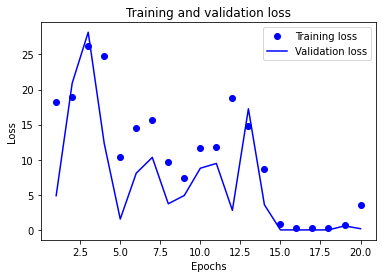

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

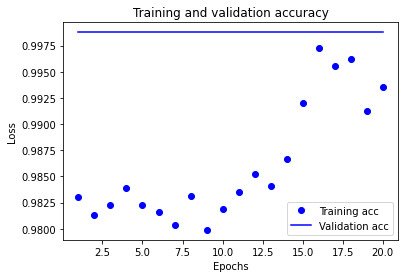

In [26]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
results = network.evaluate(tsd, tsl)

3276/3276 [==============================] - 15s 5ms/step - loss: 0.1826 - accuracy: 0.9988
